### Exploring the data, and the demographic

Firstly we will need to import the data, in this analysis we will use: pandas, numpy, seaborn, matplotlib

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_loader

Then we will load all the data we will probably need to analyze:

In [61]:
ratings, movies, users, genres, occupations = data_loader.load_data()
movies_ratings = data_loader.create_movie_ratings_array(ratings, movies)
user_ratings = data_loader.create_user_ratings_array(ratings, users)

Let's then print the shape of our data along with the first few lines so that we know what exactly we are working with:

In [62]:
print(f"The shape of the ratings data frame is {ratings.shape}")
print("The first 5 lines of data are:")
print(ratings[:5])

The shape of the ratings data frame is (100000, 4)
The first 5 lines of data are:
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596


In [63]:
print(f"The shape of the movies data frame is {movies.shape}")
print("The first 5 lines of data are:")
print(movies[:5])

The shape of the movies data frame is (1682, 24)
The first 5 lines of data are:
   movieId              title  releaseDate  videoReleaseDate  \
0        1   Toy Story (1995)  01-Jan-1995               NaN   
1        2   GoldenEye (1995)  01-Jan-1995               NaN   
2        3  Four Rooms (1995)  01-Jan-1995               NaN   
3        4  Get Shorty (1995)  01-Jan-1995               NaN   
4        5     Copycat (1995)  01-Jan-1995               NaN   

                                             imdbUrl  unknown  action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   adventure  animation  children's  ...  fantasy  film-noir  horror  musical  \
0          0   

In [64]:
print(f"The shape of the users data frame is {users.shape}")
print("The first 5 lines of data are:")
print(users[:5])

The shape of the users data frame is (943, 5)
The first 5 lines of data are:
   userId  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [65]:
print(f"The shape of the genres data frame is {genres.shape}")
print("The first 5 lines of data are:")
print(genres[:5])

The shape of the genres data frame is (19, 1)
The first 5 lines of data are:
            genre
unknown         0
Action          1
Adventure       2
Animation       3
Children's      4


In [66]:
print(f"The shape of the occupations data frame is {occupations.shape}")
print("The first 5 lines of data are:")
print(occupations[:5])

The shape of the occupations data frame is (21, 1)
The first 5 lines of data are:
      occupation
0  administrator
1         artist
2         doctor
3       educator
4       engineer


In [67]:
print(f"The shape of movie & ratings data frame is {movies_ratings.shape}")
print("The first 5 lines of data are:")
print(movies_ratings[:5])

The shape of movie & ratings data frame is (100000, 27)
The first 5 lines of data are:
   userId  movieId  rating  timestamp                       title  \
0     196      242       3  881250949                Kolya (1996)   
1     186      302       3  891717742    L.A. Confidential (1997)   
2      22      377       1  878887116         Heavyweights (1994)   
3     244       51       2  880606923  Legends of the Fall (1994)   
4     166      346       1  886397596         Jackie Brown (1997)   

   releaseDate  videoReleaseDate  \
0  24-Jan-1997               NaN   
1  01-Jan-1997               NaN   
2  01-Jan-1994               NaN   
3  01-Jan-1994               NaN   
4  01-Jan-1997               NaN   

                                             imdbUrl  unknown  action  ...  \
0    http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   
1  http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...        0       0  ...   
2  http://us.imdb.com/M/title-exact?Heavyweight

In [68]:
print(f"The shape of the user & ratings data frame is {user_ratings.shape}")
print("The first 5 lines of data are:")
print(user_ratings[:5])

The shape of the user & ratings data frame is (100000, 8)
The first 5 lines of data are:
   userId  movieId  rating  timestamp  age gender  occupation zipcode
0     196      242       3  881250949   49      M      writer   55105
1     186      302       3  891717742   39      F   executive   00000
2      22      377       1  878887116   25      M      writer   40206
3     244       51       2  880606923   28      M  technician   80525
4     166      346       1  886397596   47      M    educator   55113


Now that we have an idea about our initial data, the next thing we could do is analyze the profiles of the people rating the data. We could view the count of ratings as well as the average rating per the age as well as occupation and gender. The result of this analysis will probably be highly theoretical since we do not know the quality of data and the dataset is pretty old.

In [69]:
ratings_stats_per_age = (
    user_ratings.groupby("age", as_index=False)['rating']
    .agg(count='count', mean='mean')
)
print(ratings_stats_per_age.head())

   age  count      mean
0    7     43  3.767442
1   10     31  3.387097
2   11     27  2.925926
3   13    497  3.470825
4   14    264  3.375000


In [70]:
ratings_stats_per_gender = (
    user_ratings.groupby("gender", as_index=False)['rating']
    .agg(count='count', mean='mean')
)
print(ratings_stats_per_gender.head())

  gender  count      mean
0      F  25740  3.531507
1      M  74260  3.529289


In [71]:
ratings_stats_per_occupation = (
    user_ratings.groupby("occupation", as_index=False)['rating']
    .agg(count='count', mean='mean')
)
print(ratings_stats_per_occupation.head())

      occupation  count      mean
0  administrator   7479  3.635646
1         artist   2308  3.653380
2         doctor    540  3.688889
3       educator   9442  3.670621
4       engineer   8175  3.541407


Personally I do not really care too much about zip codes, they could probably be used to track location, but I'm not interested enough to get that deep.Another final stat that i would like to explore is definitely rating count and mean by age and gender.

In [72]:
ratings_stats_per_age_and_gender = (
    user_ratings.groupby(["age", "gender"], as_index=False)['rating']
    .agg(count='count', mean='mean')
)
print(ratings_stats_per_age_and_gender.head())

   age gender  count      mean
0    7      M     43  3.767442
1   10      M     31  3.387097
2   11      M     27  2.925926
3   13      F     69  3.144928
4   13      M    428  3.523364


Then, to get a better feel of the data it would be a good idea to visualize it. We will be creating various diagrams to visualize the data we grouped above. From the dataset we know that the rating has a min value of 0 and a max value of 5.

<Axes: xlabel='age', ylabel='count'>

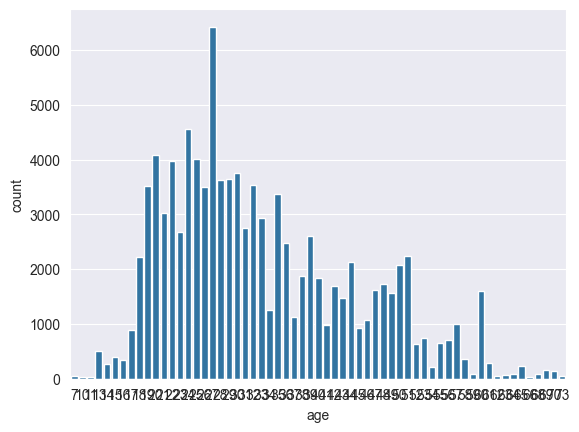

In [83]:
# sns.histplot(ratings_stats_per_age, x="age", y= "count", bins=100)

# sns.barplot(ratings_stats_per_age, x="age", y="count")